## What Areas Should the Agency Focus On?

Let's do more exploratory analysis and answer Question 2 problem statement:

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In [1]:
import pandas as pd
import numpy as np

#read data from question1
df = pd.read_csv('data.csv', parse_dates= ['created_date', 'closed_date'])
df.head()

,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,0,2019-12-06 08:31:57,45100253,FLOORING/STAIRS,10027.0,236 WEST 122 STREET,WEST 122 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.807542,-73.950956,nan,RESIDENTIAL BUILDING,Open
1,1,2019-12-06 06:40:52,45100134,UNSANITARY CONDITION,10022.0,250 EAST 50 STREET,EAST 50 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.755335,-73.969630,nan,RESIDENTIAL BUILDING,Open
2,2,2019-12-06 04:01:22,45100112,PLUMBING,11226.0,1639 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.646064,-73.949053,nan,RESIDENTIAL BUILDING,Open
3,3,2019-12-06 04:35:22,45100011,PAINT/PLASTER,10467.0,3475 KNOX PLACE,KNOX PLACE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.882535,-73.882801,nan,RESIDENTIAL BUILDING,Open
4,4,2019-12-06 07:16:55,45099918,PAINT/PLASTER,10451.0,271 EAST 150 STREET,EAST 150 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.817890,-73.921811,nan,RESIDENTIAL BUILDING,Open


In [2]:
#List columns names and drop "Unamed" column
df.columns
df.drop(['Unnamed: 0'], axis=1)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-12-06 08:31:57,45100253,FLOORING/STAIRS,10027.0,236 WEST 122 STREET,WEST 122 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.807542,-73.950956,nan,RESIDENTIAL BUILDING,Open
1,2019-12-06 06:40:52,45100134,UNSANITARY CONDITION,10022.0,250 EAST 50 STREET,EAST 50 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.755335,-73.969630,nan,RESIDENTIAL BUILDING,Open
2,2019-12-06 04:01:22,45100112,PLUMBING,11226.0,1639 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.646064,-73.949053,nan,RESIDENTIAL BUILDING,Open
3,2019-12-06 04:35:22,45100011,PAINT/PLASTER,10467.0,3475 KNOX PLACE,KNOX PLACE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.882535,-73.882801,nan,RESIDENTIAL BUILDING,Open
4,2019-12-06 07:16:55,45099918,PAINT/PLASTER,10451.0,271 EAST 150 STREET,EAST 150 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.817890,-73.921811,nan,RESIDENTIAL BUILDING,Open
5,2019-12-06 08:48:42,45099834,FLOORING/STAIRS,11236.0,888 EAST 96 STREET,EAST 96 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.648017,-73.906903,nan,RESIDENTIAL BUILDING,Open
6,2019-12-06 08:54:47,45099296,HEAT/HOT WATER,10453.0,1760 MONTGOMERY AVENUE,MONTGOMERY AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.850722,-73.918114,nan,RESIDENTIAL BUILDING,Open
7,2019-12-06 08:44:28,45098897,GENERAL,10028.0,1533 YORK AVENUE,YORK AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.772806,-73.949415,nan,RESIDENTIAL BUILDING,Open
8,2019-12-06 08:32:23,45098626,HEAT/HOT WATER,10027.0,236 WEST 122 STREET,WEST 122 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.807542,-73.950956,1575641789000000000,RESIDENTIAL BUILDING,Closed
9,2019-12-06 06:49:47,45098316,UNSANITARY CONDITION,10022.0,250 EAST 50 STREET,EAST 50 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.755335,-73.969630,nan,RESIDENTIAL BUILDING,Open


### Filter the data to get all HEAT/ HOT WATER data

In [7]:
#Filter our dataset out based on our Top complaint: HEAT/HOT WATER from question 1
df_top= df[(df['complaint_type'] == 'HEAT/HOT WATER')]

#Drop Unamed and list the first 5 columns
df_top.drop(['Unnamed: 0'], axis=1).head() 

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
6,2019-12-06 08:54:47,45099296,HEAT/HOT WATER,10453.0,1760 MONTGOMERY AVENUE,MONTGOMERY AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.850722,-73.918114,nan,RESIDENTIAL BUILDING,Open
8,2019-12-06 08:32:23,45098626,HEAT/HOT WATER,10027.0,236 WEST 122 STREET,WEST 122 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.807542,-73.950956,1575641789000000000,RESIDENTIAL BUILDING,Closed
12,2019-12-06 08:34:41,45098092,HEAT/HOT WATER,10031.0,3351 BROADWAY,BROADWAY,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.820463,-73.954820,1575622447000000000,RESIDENTIAL BUILDING,Closed
17,2019-12-06 07:37:59,45096989,HEAT/HOT WATER,10303.0,39 DE HART AVENUE,DE HART AVENUE,ADDRESS,STATEN ISLAND,The following complaint conditions are still o...,STATEN ISLAND,40.635505,-74.156967,nan,RESIDENTIAL BUILDING,Open
18,2019-12-06 06:32:29,45096792,HEAT/HOT WATER,10031.0,3565 BROADWAY,BROADWAY,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.827202,-73.949897,1575743202000000000,RESIDENTIAL BUILDING,Closed


### Borough Wise Analysis

In [8]:
##Filter our dataset out based on Borough for HEAT/HOT WATER
df_top['borough'].value_counts().to_frame()

,borough
BRONX,393281
BROOKLYN,370592
MANHATTAN,274932
QUEENS,161324
STATEN ISLAND,11904
Unspecified,1


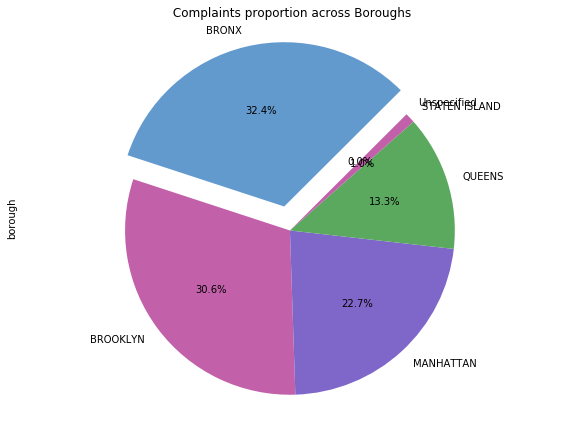

In [14]:
import matplotlib.pyplot as plt

#Let's visualize the distribution of complaints per borough
colors = ['#639ace', '#c360aa', '#7f67ca', '#5ba85f', '#c360aa', '#a7993f', '#cc566a']
explode = [0.15, 0, 0, 0, 0, 0]
df_top['borough'].value_counts().plot(kind='pie', 
                                      autopct= '%1.1f%%',
                                     explode = explode,
                                     startangle= 45,
                                     colors = colors,
                                     figsize= (8, 6))
plt.title(' Complaints proportion across Boroughs')
plt.axis('equal')
plt.tight_layout()
plt.show()

###### As we can see, most complaints come from BRONX followed by BROOKLYN. Let's see the distribution of complaints at the street and zip levels.

In [31]:
#change incident zip data type to int
df_top['incident_zip']= df_top['incident_zip'].astype('int')
df_top['incident_zip'].head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,0
incident_zip,
11226,40298
10458,37369
10467,36613
10468,32971
10453,32938
10452,27035
10031,26402
10457,26237
10456,24636


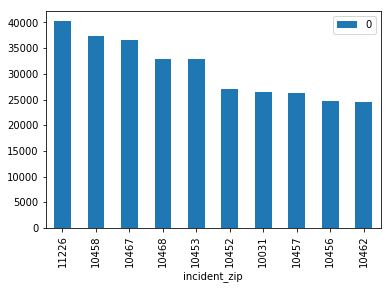

In [35]:
#Number of complaints per Zip Code
Zip= df_top.groupby(['incident_zip']).size()

#Top 10 zip codes with the higest complaints
Zip_10= Zip.sort_values(ascending= False).head(10).to_frame()
Zip_10.plot(kind='bar')

In [52]:
#Number of complaints per street
Street= df_top[['street_name', 'complaint_type']].groupby('street_name').count().reset_index()
Street= Street.sort_values(by='complaint_type', ascending= False)
Street.head(30)

,street_name,complaint_type
2734,GRAND CONCOURSE,21328
1358,BROADWAY,14985
2450,ELMHURST AVENUE,10739
3679,OCEAN AVENUE,9699
3520,MORRIS AVENUE,9450
1269,BOYNTON AVENUE,8583
4311,ST NICHOLAS AVENUE,8234
743,AMSTERDAM AVENUE,7124
1856,DR M L KING JR BOULEVARD,6511
3683,OCEAN PARKWAY,6065


In [59]:
#Top 10 street with highest complaints
Street_10 = pd.DataFrame(Street.head(10))
Street_10

,street_name,complaint_type
2734,GRAND CONCOURSE,21328
1358,BROADWAY,14985
2450,ELMHURST AVENUE,10739
3679,OCEAN AVENUE,9699
3520,MORRIS AVENUE,9450
1269,BOYNTON AVENUE,8583
4311,ST NICHOLAS AVENUE,8234
743,AMSTERDAM AVENUE,7124
1856,DR M L KING JR BOULEVARD,6511
3683,OCEAN PARKWAY,6065


In [67]:
#Set 'borough','incident_zip' and 'complaint_type' as indeces and group the data accordingly
#to capture the borough and zip codes with the highest service request for our top complaint

test=df_top[['borough','incident_zip', 'complaint_type']].groupby(['borough', 'incident_zip'], as_index = False).count()
test.sort_values('complaint_type', ascending= False, inplace= True)
top_10= test.head(10)
top_10

,borough,incident_zip,complaint_type
51,BROOKLYN,11226,40298
7,BRONX,10458,37369
16,BRONX,10467,36613
17,BRONX,10468,32971
2,BRONX,10453,32938
1,BRONX,10452,27035
93,MANHATTAN,10031,26402
6,BRONX,10457,26237
5,BRONX,10456,24636
11,BRONX,10462,24502


In [71]:
#Let's create a pivot table to see the distribution of Heat/hot water per Szip code and Boroughs
pivot_zip= top_10.pivot(index='borough',columns='incident_zip')
pivot_zip = pivot_zip.fillna(0)
pivot_zip

complaint_type                                               \
incident_zip          10031    10452    10453    10456    10457    10458   
borough                                                                    
BRONX                   0.0  27035.0  32938.0  24636.0  26237.0  37369.0   
BROOKLYN                0.0      0.0      0.0      0.0      0.0      0.0   
MANHATTAN           26402.0      0.0      0.0      0.0      0.0      0.0   

                                                  
incident_zip    10462    10467    10468    11226  
borough                                           
BRONX         24502.0  36613.0  32971.0      0.0  
BROOKLYN          0.0      0.0      0.0  40298.0  
MANHATTAN         0.0      0.0      0.0      0.0

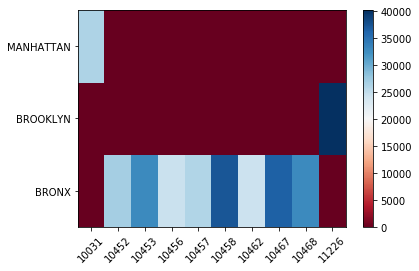

In [76]:
#Let's visualize the relationship between the boroughs and the severity of these complaints
%matplotlib inline 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.pcolor(pivot_zip, cmap='RdBu')

#label names
row_labels = pivot_zip.columns.levels[1]
col_labels = pivot_zip.index


#move ticks and labels to the center
ax.set_xticks(np.arange(pivot_zip.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot_zip.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)

fig.colorbar(im)
plt.show()

From our sorted data and our pivot visualization, we observe the zip codes with the highest incidents are from  BRONX's borough. So these top 10 zip codes are the areas that should be focused on.

As explored before HEAT/HOT WATER has the highest occurrence. Additionally, Boroughs such as Bronx, Manhattan and Brooklyn have the highest request of services.
But to have a better idea and confidence let's visualize the areas and their respective number of service requests.

In [77]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-3.3.0               |           py36_0         747 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         846 KB

The following NEW packages will be INSTALLED:

    altair:  3.3.0-py36_0 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


folium-0.5.0         | 45 KB     | #################################

In [52]:
from folium import plugins
#Let's visualize the map with circle marker
NY_map = folium.Map(location=[NYC_lat, NYC_long], zoom_start=10)

# loop through the complaints and add each to the map
for lat, lng, label in zip(bronx.latitude, bronx.longitude, bronx.complaint_type):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, 
        color='orange',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(NY_map)

# show map
NY_map

#### Conclusion

From our exploratory analysis, we can conclude that boroughs such as Bronx has the highest complaints service requests. Therefore, the Department of Housing Preservation and Development of New York City should emphasize their service provisions in this zone, specifically the top 10 zip codes and street areas.
In the next notebook we will focus on exploring the Bronx borough as it is the area with the most severe complaints.